In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import requests
import json

# API
# Historic values for all states
url = "https://api.covidtracking.com/v1/states/daily.json"

In [197]:
# Request data
df = pd.DataFrame(requests.get(url).json())
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,


In [198]:
# Select related columns
df_clean = df[["date", "state", "recovered", "death"]]
df_clean.head()

,date,state,recovered,death
0,20210307,AK,NaN,305.0
1,20210307,AL,295690.0,10148.0
2,20210307,AR,315517.0,5319.0
3,20210307,AS,NaN,0.0
4,20210307,AZ,NaN,16328.0


In [199]:
# Drop all rows with missing information
df_new = df_clean.dropna(how='any')
df_new.head()

,date,state,recovered,death
1,20210307,AL,295690.0,10148.0
2,20210307,AR,315517.0,5319.0
8,20210307,DC,29570.0,1030.0
12,20210307,GU,7590.0,133.0
14,20210307,IA,320054.0,5558.0


In [200]:
# group by state
df_state = df_new.groupby(["state"])

## To calculate average number of deaths and recovered over all time

In [201]:
# averaged number of deaths per state
per_state_death_mean = df_state.mean()["death"]

# averaged number of recovered per state
per_state_recover_mean = df_state.mean()["recovered"]

In [202]:
# Create a DataFrame with columns for the calculations above
per_state_summary = pd.DataFrame({"average deaths": per_state_death_mean,
                                   "average recovered": per_state_recover_mean})
per_state_summary.head()

,average deaths,average recovered
state,,
AK,31.852679,2153.107143
AL,3537.079310,109245.755172
AR,1728.623563,97263.810345
CT,4209.088398,8242.187845
DC,596.708934,11432.207493


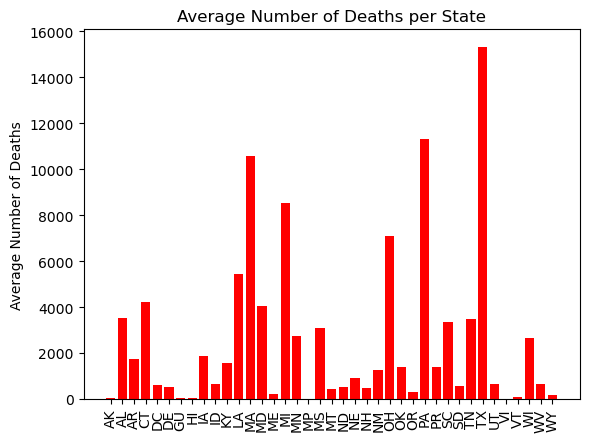

In [203]:
# Generate a bar plot showing the averaged number of deaths for each state using pyplot
y_axis = per_state_summary["average deaths"]
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color="red")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values, rotation=90)
plt.ylabel("Average Number of Deaths")
plt.title("Average Number of Deaths per State")
plt.savefig("ave_death_state_bar.png", bbox_inches="tight")
plt.show()

In [204]:
# Set a nex index column
per_state_summary['state'] = per_state_summary.index
per_state_summary.head()

,average deaths,average recovered,state
state,,,
AK,31.852679,2153.107143,AK
AL,3537.079310,109245.755172,AL
AR,1728.623563,97263.810345,AR
CT,4209.088398,8242.187845,CT
DC,596.708934,11432.207493,DC


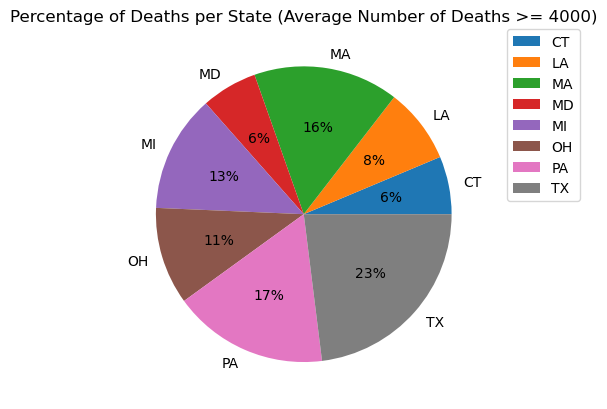

In [205]:
# Generate a pie plot showing the averaged number of deaths for each state using pyplot
# Create a new data frame that only have average deaths >= 4000
ave_death_df = per_state_summary.loc[per_state_summary["average deaths"] >= 4000, :]
state_list = ave_death_df["average deaths"]
pie_labels = ave_death_df["state"]
plt.pie(state_list, labels = pie_labels, autopct='%1.0f%%')
plt.title("Percentage of Deaths per State (Average Number of Deaths >= 4000)")
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.savefig("percent_death_state_pie.png", bbox_inches="tight")
plt.show()

In [206]:
# Find the max and min of the average deaths
max_number = per_state_summary["average deaths"].max()
max_state = per_state_summary["average deaths"].idxmax()
min_number = per_state_summary["average deaths"].min()
min_state = per_state_summary["average deaths"].idxmin()

print("Conclusion:")
print(max_state, "has the maximum average number of deaths:", max_number)
print(min_state, "has the minimum average number of deaths:", min_number)

Conclusion:
TX has the maximum average number of deaths: 15323.201166180757
MP has the minimum average number of deaths: 2.0


In [207]:
# Calculate Independent (Two Sample) t-test
# PA and MA based on the pie chart
pa_state_df = df_new[df_new["state"] == "PA"]
ma_state_df = df_new[df_new["state"] == "MA"]
stats.ttest_ind(pa_state_df["death"], ma_state_df["death"], equal_var=False)

Ttest_indResult(statistic=1.964220584545114, pvalue=0.05020249075568835)

### Conclusion for the Independent T-test: 
Since the p-value is less than 0.05, we accept the null hypothesis of the t-test and conclude that there is sufficient evidence to say that the two states lead to same mean exam of average number of deaths.

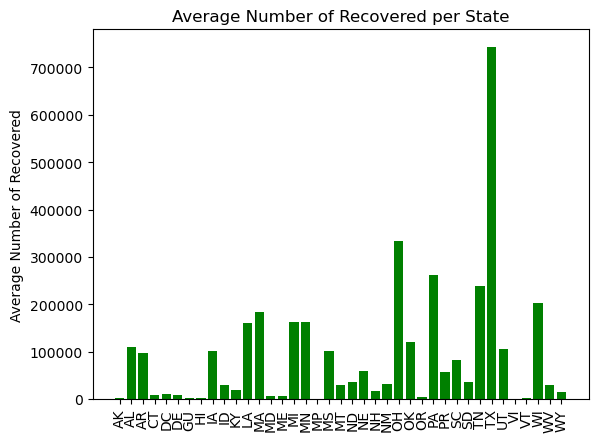

In [208]:
# Generate a bar plot showing the averaged number of recovered for each state using pyplot
y_axis = per_state_summary["average recovered"]
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color="green")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values, rotation=90)
plt.ylabel("Average Number of Recovered")
plt.title("Average Number of Recovered per State")
plt.savefig("ave_recover_state_bar.png", bbox_inches="tight")
plt.show()

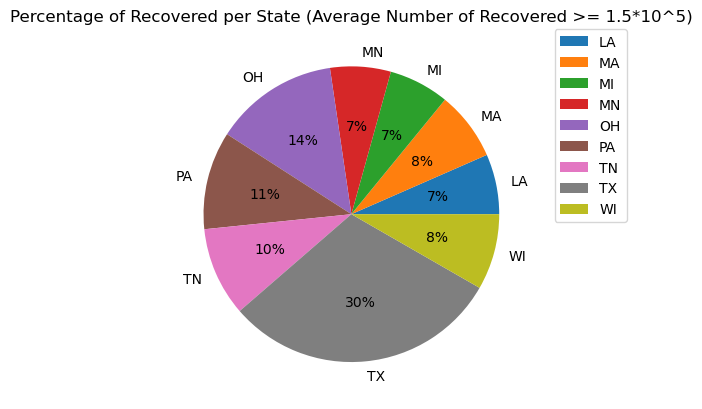

In [209]:
# Generate a pie plot showing the averaged number of recovered for each state using pyplot
# Create a new data frame that only have average recovered >= 150000
ave_death_df = per_state_summary.loc[per_state_summary["average recovered"] >= 150000, :]
state_list = ave_death_df["average recovered"]
pie_labels = ave_death_df["state"]
plt.pie(state_list, labels = pie_labels, autopct='%1.0f%%')
plt.title("Percentage of Recovered per State (Average Number of Recovered >= 1.5*10^5)")
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.savefig("percent_recover_state_pie.png", bbox_inches="tight")
plt.show()

In [210]:
# Find the max and min of the average recovered
max_number = per_state_summary["average recovered"].max()
max_state = per_state_summary["average recovered"].idxmax()
min_number = per_state_summary["average recovered"].min()
min_state = per_state_summary["average recovered"].idxmin()

print("Conclusion:")
print(max_state, "has the maximum average number of recovered:", max_number)
print(min_state, "has the minimum average number of recovered:", min_number)

Conclusion:
TX has the maximum average number of recovered: 743015.5655976676
MP has the minimum average number of recovered: 25.287037037037038


In [211]:
# Calculate Independent (Two Sample) t-test
# OH and PA based on the pie chart
oh_state_df = df_new[df_new["state"] == "OH"]
pa_state_df = df_new[df_new["state"] == "PA"]
stats.ttest_ind(oh_state_df["recovered"], pa_state_df["recovered"], equal_var=False)

Ttest_indResult(statistic=2.950962633952038, pvalue=0.003319777981963682)

### Conclusion for the Independent T-test: 
Since the p-value is less than 0.05, we reject the null hypothesis of the t-test and conclude that there is sufficient evidence to say that the two states lead to different mean exam of average number of deaths.

## To calculate average number of deaths and recovered per month in TX

In [212]:
# Convert date into year-month, year, month and date2
df_new["year-month"] = df_new.loc[:, "date"].astype(str).str.slice(0,6)
df_new["year"] = df_new.loc[:, "date"].astype(str).str.slice(0,4)
df_new["month"] = df_new.loc[:, "date"].astype(str).str.slice(4,6)
df_new["date2"] = df_new.loc[:, "date"].astype(str).str.slice(6,8)

C:\Users\jhyan\AppData\Local\Temp\ipykernel_2360\682402629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["year-month"] = df_new.loc[:, "date"].astype(str).str.slice(0,6)
C:\Users\jhyan\AppData\Local\Temp\ipykernel_2360\682402629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["year"] = df_new.loc[:, "date"].astype(str).str.slice(0,4)
C:\Users\jhyan\AppData\Local\Temp\ipykernel_2360\682402629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [213]:
# Find data only for TX
df_tx = df_new.loc[df_new["state"].str.contains('TX')]

In [214]:
# Group by year-month
df_txnew = df_tx.groupby(["year-month"])

In [215]:
# averaged number of deaths per state
per_state_death_mean_tx = df_txnew.mean()["death"]

# averaged number of recovered per state
per_state_recover_mean_tx = df_txnew.mean()["recovered"]

C:\Users\jhyan\AppData\Local\Temp\ipykernel_2360\3620283249.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  per_state_death_mean_tx = df_txnew.mean()["death"]
C:\Users\jhyan\AppData\Local\Temp\ipykernel_2360\3620283249.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  per_state_recover_mean_tx = df_txnew.mean()["recovered"]


In [216]:
# Create a DataFrame with columns for the calculations above
tx_summary = pd.DataFrame({"average deaths": per_state_death_mean_tx,
                                   "average recovered": per_state_recover_mean_tx})
tx_summary.head()

,average deaths,average recovered
year-month,,
202003,37.500000,38.000000
202004,381.266667,4622.900000
202005,1261.903226,26836.516129
202006,2040.233333,61314.533333
202007,3892.096774,163589.000000


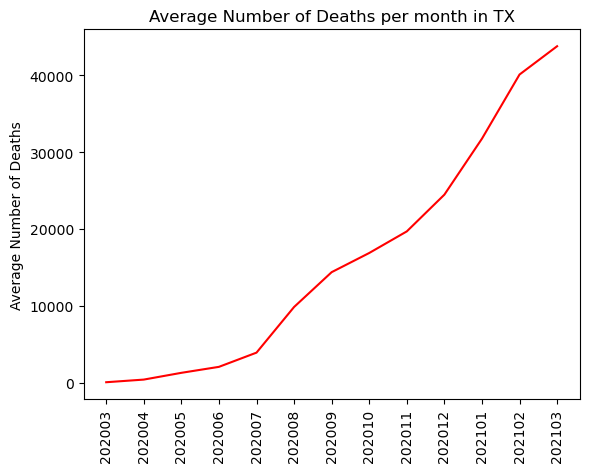

In [217]:
# Generate a line plot of average number of deaths per month in TX
y_axis = per_state_death_mean_tx
x_axis = np.arange(len(y_axis))
plt.plot(x_axis, y_axis, color="red")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values, rotation=90)
plt.ylabel("Average Number of Deaths")
plt.title("Average Number of Deaths per month in TX")
plt.savefig("ave_death_tx_line.png", bbox_inches="tight")
plt.show()

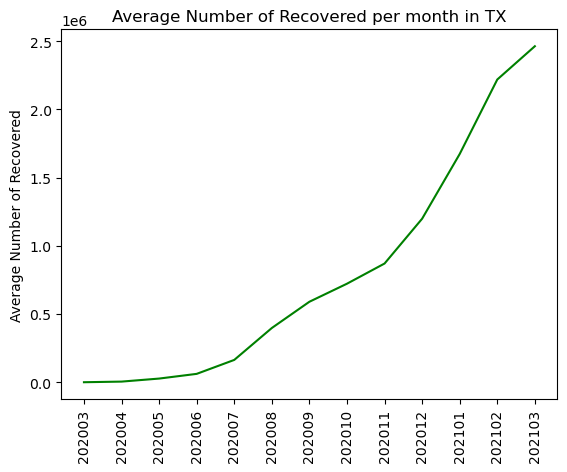

In [218]:
# Generate a line plot of average number of deaths per month in TX
y_axis = per_state_recover_mean_tx
x_axis = np.arange(len(y_axis))
plt.plot(x_axis, y_axis, color="green")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values, rotation=90)
plt.ylabel("Average Number of Recovered")
plt.title("Average Number of Recovered per month in TX")
plt.savefig("ave_recover_tx_line.png", bbox_inches="tight")
plt.show()

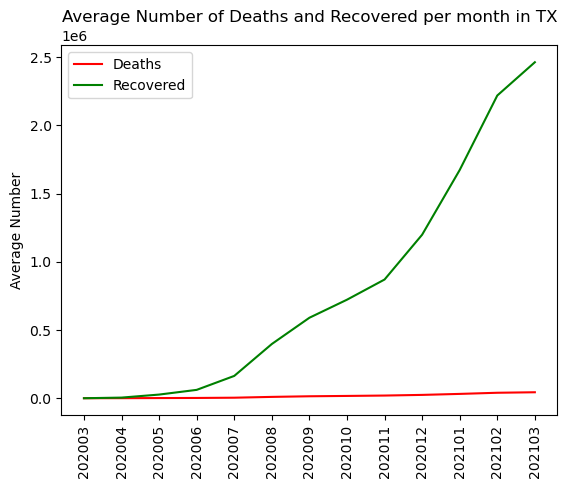

In [219]:
# Generate a line plot of average number of deaths and recovered per month in TX
y_axis = per_state_death_mean_tx
x_axis = np.arange(len(y_axis))
plt.plot(x_axis, per_state_death_mean_tx, color="red", label="Deaths")
plt.plot(x_axis, per_state_recover_mean_tx, color="green", label="Recovered")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values, rotation=90)
plt.ylabel("Average Number")
plt.title("Average Number of Deaths and Recovered per month in TX")
plt.legend()
plt.savefig("ave_death_recover_tx_line.png", bbox_inches="tight")
plt.show()